In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
scaled_data = pd.read_csv("Normalized_data.csv")
target = pd.read_csv("Target.csv").squeeze()


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size=0.3, random_state=0)

In [5]:
# Reshape data for CNN (example: 1D CNN)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [6]:
# CNN model
model = keras.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [9]:

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
Y_train_np = Y_train.values  # Convert Pandas Series to NumPy array

# Now, train your model with the NumPy array
history = model.fit(
    X_train_reshaped,
    Y_train_np,  # Use the NumPy array
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
158/158 [==============================] - 8s 45ms/step - loss: 0.5760 - accuracy: 0.6709 - val_loss: 0.4994 - val_accuracy: 0.7303
Epoch 2/50
158/158 [==============================] - 7s 44ms/step - loss: 0.5110 - accuracy: 0.7211 - val_loss: 0.4683 - val_accuracy: 0.7629
Epoch 3/50
158/158 [==============================] - 7s 43ms/step - loss: 0.4830 - accuracy: 0.7489 - val_loss: 0.4553 - val_accuracy: 0.7454
Epoch 4/50
158/158 [==============================] - 7s 45ms/step - loss: 0.4593 - accuracy: 0.7728 - val_loss: 0.4167 - val_accuracy: 0.8162
Epoch 5/50
158/158 [==============================] - 7s 46ms/step - loss: 0.4461 - accuracy: 0.7857 - val_loss: 0.4080 - val_accuracy: 0.8154
Epoch 6/50
158/158 [==============================] - 8s 48ms/step - loss: 0.4313 - accuracy: 0.7951 - val_loss: 0.3988 - val_accuracy: 0.8059
Epoch 7/50
158/158 [==============================] - 8s 48ms/step - loss: 0.4295 - accuracy: 0.7913 - val_loss: 0.3857 - val_accuracy: 0.8234

In [12]:
# Evaluate model
predicted_prob = model.predict(X_test_reshaped)
predicted = (predicted_prob > 0.5).astype(int)


85/85 [==============================] - 0s 810us/step


In [13]:
# Metrics
confusion_cnn = confusion_matrix(Y_test, predicted)
print("CNN Confusion Matrix:\n", confusion_cnn)


CNN Confusion Matrix:
 [[1112  237]
 [ 143 1202]]


In [14]:

classification_report_cnn = classification_report(Y_test, predicted)
print("CNN Classification Report:\n", classification_report_cnn)

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1349
           1       0.84      0.89      0.86      1345

    accuracy                           0.86      2694
   macro avg       0.86      0.86      0.86      2694
weighted avg       0.86      0.86      0.86      2694



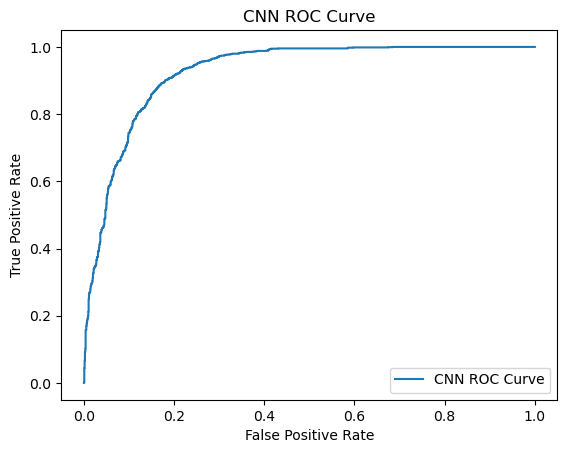

In [15]:
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(Y_test, predicted_prob)
plt.plot(fpr_cnn, tpr_cnn, label='CNN ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve')
plt.legend()
plt.show()

In [16]:
cnn_auc_score = roc_auc_score(Y_test, predicted_prob)
print("CNN AUC Score:", cnn_auc_score)

CNN AUC Score: 0.9257048453900867
